# Case Study: synthetic data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from utils.dataset import standard_scale_data

plt.rcParams.update({
    'font.size': 8,
    'font.family': 'Times New Roman',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
})

In [2]:
# read and prepare data

data = pd.read_excel(os.path.join(os.getcwd(), 'results','synthetic_and_real1','metrics_.xlsx'),index_col=0)
data = data[data["name"].str.contains("noise_0_0_")]
data = data[data['n_run'] == 0]


metrics = ['rmse', 'sharpness_std', 'picp', 'nll', 'crps', 'interval', 'pinball', 'cwc',
        'cal_score', 'ence', 'uce', 'ecpe', 'qce']
# exclude 'rms_cal', 'ma_cal', 'miscal_area' is I have no clue where they originate from and how they work (uncertainty toolbox).
# check score is the same as pinball loss. Use Pinball as the netcal library seems to be better implmented then the uncertainty toolbox.
data = data[metrics + ['name', 'calibration']]
data = data.sort_values(by = 'rmse', axis = 0)

new_column_names = {
    'rmse': 'RMSE',
    'sharpness_std': 'Sharpness',
    'picp': 'PICP',
    'nll': 'NLL',
    'crps': 'CRPS',
    'interval': 'IS',
    'pinball': 'Pinball',
    'cwc': 'CWC',
    'cal_score': 'CalS',
    'ence': 'ENCE',
    'uce': 'UCE',
    'ecpe': 'ECPE',
    'qce': 'QCE'
}

new_data_names = {
    'noise_0_0_stribeck': '1',
    'noise_0_0_make_sparse_uncorrelated': '2',
    'noise_0_0_make_regression': '3',
    'noise_0_0_arctan': '4',
    'noise_0_0_euclidean_distance': '5',
    'noise_0_0_nernst': '6',
    'noise_0_0_make_friedman3': '7',
    'noise_0_0_mlp': '8',
    'noise_0_0_make_friedman1': '9',
    'noise_0_0_make_friedman2': '10'
}


data_set_name = data['name'].unique()
data.rename(columns=new_column_names, inplace=True)
data['name'] = data['name'].map(new_data_names).fillna(data['name']).astype(str)

metrics = list(new_column_names.values())
data['PICP'] = abs(data['PICP'] - 0.95)


cal_groups = data.groupby('calibration')

noncal_data = cal_groups.get_group('none')
noncal_data = noncal_data.set_index('name')
noncal_data = noncal_data.drop('calibration', axis='columns')

# normalize data
df = noncal_data
scaled_data, scaler_dict = standard_scale_data(df[metrics].copy())

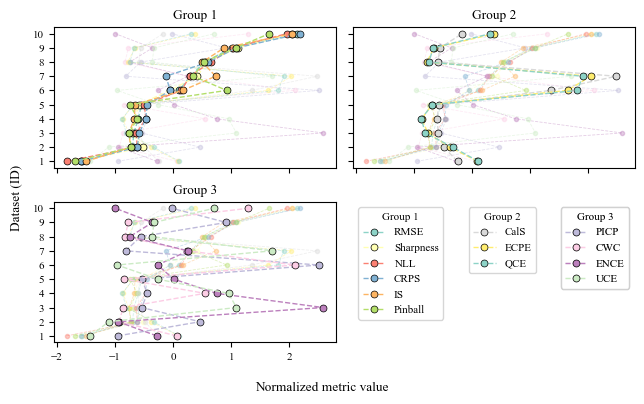

In [3]:
# visualisation

colors = sns.color_palette('Set3', 13)
handles = []
handles00 = []
handles01 = []
handles10 = []
handles11 = []

group_marker_size = 5
marker_size = 3
group_alpha = 1
alpha = 0.4
group_line_width = 1
line_width = 0.6
group_markeredgecolor='black'
group_markeredgewidth=0.5

fig, ax = plt.subplots(2,2, figsize=(6.5,4), sharex= True, sharey= True)
# first pass (to avoid overlapping). Plot all faded out metrics to each subplot.
for i, m in enumerate(metrics):
    col = colors[i]
    if m not in ['RMSE', 'CRPS', 'NLL', 'Sharpness', 'IS', 'Pinball']:
        ax[0,0].plot(scaled_data[m], scaled_data.index, marker = 'o', linestyle = '--', linewidth=line_width, label = m, color = col, alpha = alpha, 
                        markersize = marker_size)
    if m not in ['CalS', 'ECPE', 'QCE']:
        ax[0,1].plot(scaled_data[m], scaled_data.index, marker = 'o', linestyle = '--', linewidth=line_width, label = m, color = col, alpha = alpha, 
                        markersize = marker_size)
    if m not in ['CWC','UCE', 'ENCE', 'PICP']:
        ax[1,0].plot(scaled_data[m], scaled_data.index, marker = 'o', linestyle = '--', linewidth=line_width, label = m, color = col, alpha = alpha, 
                        markersize = marker_size)

# second pass. Plot all full-color metrics to each subplot
for i, m in enumerate(metrics):
    col = colors[i]
    # plot [0,0]
    if m in ['RMSE', 'CRPS', 'NLL', 'Sharpness', 'IS', 'Pinball']:
        handles00.append(mlines.Line2D([],[], color= col, marker = 'o', linestyle= '--', linewidth=group_line_width, markersize=group_marker_size, 
                                       markeredgecolor=group_markeredgecolor, markeredgewidth=group_markeredgewidth, label = m))
        ax[0,0].plot(scaled_data[m], scaled_data.index, marker = 'o', linestyle = '--', linewidth=group_line_width, label = m, color = col, alpha = group_alpha, 
                     markersize = group_marker_size, markeredgecolor=group_markeredgecolor, markeredgewidth=group_markeredgewidth)
    # plot [0,1]
    if m in ['CalS', 'ECPE', 'QCE']:
        handles01.append(mlines.Line2D([],[], color= col, marker = 'o', linestyle= '--', linewidth=group_line_width, markersize=group_marker_size, 
                                       markeredgecolor=group_markeredgecolor, markeredgewidth=group_markeredgewidth, label = m))
        ax[0,1].plot(scaled_data[m], scaled_data.index, marker = 'o', linestyle = '--', linewidth=group_line_width, label = m, color = col, alpha = group_alpha, 
                     markersize = group_marker_size, markeredgecolor=group_markeredgecolor, markeredgewidth=group_markeredgewidth)
    # plot [1,0]
    if m in ['CWC','UCE', 'ENCE', 'PICP']:
        handles10.append(mlines.Line2D([],[], color= col, marker = 'o', linestyle= '--', linewidth=group_line_width, markersize=group_marker_size, 
                                       markeredgecolor=group_markeredgecolor, markeredgewidth=group_markeredgewidth, label = m))
        ax[1,0].plot(scaled_data[m], scaled_data.index, marker = 'o', linestyle = '--', linewidth=group_line_width, label = m, color = col, alpha = group_alpha, 
                     markersize = group_marker_size, markeredgecolor=group_markeredgecolor, markeredgewidth=group_markeredgewidth)

ax[0,0].set_title('Group 1')
ax[0,1].set_title('Group 2')
ax[1,0].set_title('Group 3')
ax[1,1].axis('off')

leg1 = ax[1,1].legend(handles=handles00, loc='upper left', title = 'Group 1', bbox_to_anchor=(0, 1))
leg2 = ax[1,1].legend(handles=handles01, loc='upper center', title = 'Group 2', bbox_to_anchor=(0.53, 1))
leg3 = ax[1,1].legend(handles=handles10, loc='upper right', title = 'Group 3', bbox_to_anchor=(1, 1))
ax[1, 1].add_artist(leg1)
ax[1, 1].add_artist(leg2)
ax[1, 1].add_artist(leg3)

fig.supylabel('Dataset (ID)')
fig.supxlabel('Normalized metric value')

fig.tight_layout()
plt.savefig("figures\\result_synthetic.pdf", format="pdf", bbox_inches="tight")